In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm


import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.0


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Here 
0-> Legit Transaction
1-> Fraud Transaction

In [ ]:
data.shape                                                    

(284807, 31)

Checking the distribution of Legit and Fraud transactions.

In [ ]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This data is highly unbalanced as it reports more than 99 percent of times as legit transaction. So, we cannot feed this directly into our model.

In [ ]:
#Checking the number of missing values in each column
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#separating the data

legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


Under-Sampling
Making the number of legit and fraud transactions equal

Number of Fraud -> 492

In [ ]:
legit_n = legit.sample(n=492) #Taking out 492 samples

Merging the new legit and fraud samples

In [ ]:
data_n = pd.concat([legit_n, fraud], axis = 0)

In [ ]:
data_n.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
117088,74534.0,-0.357993,1.077766,1.289151,0.072752,0.020203,-1.013877,0.660614,-0.047138,-0.329995,...,-0.267096,-0.724364,-0.008026,0.323052,-0.174030,0.073287,0.242486,0.097849,1.78,0
124324,77256.0,1.238656,-1.417302,-0.008874,-1.273330,-1.605464,-1.022292,-0.656401,-0.162963,-2.098971,...,-0.082218,-0.246941,-0.108679,0.483885,0.399172,-0.182942,-0.029433,0.022668,141.70,0
177812,123355.0,-0.264157,0.778577,0.232458,-0.920576,0.611408,-0.650198,1.127008,-0.325278,0.752992,...,-0.421819,-0.704049,-0.006149,-0.414659,-0.504562,0.100977,0.109233,-0.233148,8.94,0
76528,56613.0,-0.326433,-0.391379,1.546473,-1.631700,-0.395855,0.158239,-0.489154,0.032492,-2.701945,...,-0.156880,-0.083741,-0.238018,-0.772175,0.242858,0.055264,0.104202,0.070786,20.00,0
71774,54438.0,1.221766,-0.152029,0.718813,0.123456,-0.950473,-0.940924,-0.312783,-0.080173,0.512534,...,-0.191593,-0.652588,0.146456,0.389713,-0.026378,0.789799,-0.071779,0.016492,25.80,0


In [ ]:
data_n.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
data_n['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [ ]:
#Splitting Up into feature and target variable
Y = data_n['Class']
X = data_n.drop(columns='Class', axis=1)


In [ ]:
Y.head()

117088    0
124324    0
177812    0
76528     0
71774     0
Name: Class, dtype: int64

In [ ]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
117088,74534.0,-0.357993,1.077766,1.289151,0.072752,0.020203,-1.013877,0.660614,-0.047138,-0.329995,...,0.091270,-0.267096,-0.724364,-0.008026,0.323052,-0.174030,0.073287,0.242486,0.097849,1.78
124324,77256.0,1.238656,-1.417302,-0.008874,-1.273330,-1.605464,-1.022292,-0.656401,-0.162963,-2.098971,...,-0.181831,-0.082218,-0.246941,-0.108679,0.483885,0.399172,-0.182942,-0.029433,0.022668,141.70
177812,123355.0,-0.264157,0.778577,0.232458,-0.920576,0.611408,-0.650198,1.127008,-0.325278,0.752992,...,0.228654,-0.421819,-0.704049,-0.006149,-0.414659,-0.504562,0.100977,0.109233,-0.233148,8.94
76528,56613.0,-0.326433,-0.391379,1.546473,-1.631700,-0.395855,0.158239,-0.489154,0.032492,-2.701945,...,-0.014156,-0.156880,-0.083741,-0.238018,-0.772175,0.242858,0.055264,0.104202,0.070786,20.00
71774,54438.0,1.221766,-0.152029,0.718813,0.123456,-0.950473,-0.940924,-0.312783,-0.080173,0.512534,...,-0.073032,-0.191593,-0.652588,0.146456,0.389713,-0.026378,0.789799,-0.071779,0.016492,25.80


In [ ]:
#Splitting into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_test=np.array(X_test)
Y_test=np.array(Y_test)

In [ ]:
print(X.shape, X_train.shape, X_test.shape, Y_train.shape)

(984, 30) (787, 30) (197, 30) (787,)


Model Training

Logistic Regression

In [ ]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", Y_test.shape)

Shape of X_train :  (787, 30)
Shape of Y_train :  (787,)
Shape of X_test :  (197, 30)
Shape of Y_test :  (197,)


In [ ]:
def gradients(X, y, y_hat):
    
    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis/predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).
    
    # m-> number of training examples.
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db
    

In [ ]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [ ]:
def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat+1e-5)) - (1-y)*np.log(1-y_hat+1e-5))
    return loss

In [ ]:
# For nomalizing the X values

def normalize(X):
    
    # X --> Input.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
        
    return X

In [ ]:
def train(X, y, bs, epochs, lr):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.
        
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    
    # Reshaping y.
    y = y.reshape(m,1)
    
    # Normalizing the inputs.
    X = normalize(X)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)

    #plt.plot(losses)
        
    # returning weights, bias and losses(List).
    return w, b, losses

In [ ]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

In [ ]:
w, b, l = train(X_train, Y_train, bs=100, epochs=1000, lr=0.01)

In [ ]:
def predict(X):
    
    # X --> Input.
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(x, w) + b)
    
    # Empty List to store predictions.
    pred_class = []
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

In [ ]:
predictions_logistic=predict(X_test)

In [ ]:
def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy

In [ ]:
accuracy(Y_test,predictions_logistic)

0.9238578680203046

In [ ]:
tf.math.confusion_matrix(Y_test, predictions_logistic)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[91,  2],
       [13, 91]], dtype=int32)>

Using Neural Network


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation= "relu"),

  tf.keras.layers.Dense(216, activation='relu'),

  tf.keras.layers.Dense(18, activation='relu'),
  tf.keras.layers.Dropout(0.6),

  tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate= 0.008),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

X= normalize(X_train)

training= model.fit(X, Y_train, epochs= 300)

Epoch 1/300
25/25 [==============================] - 1s 3ms/step - loss: 0.6961 - accuracy: 0.5934 - precision: 0.6156 - recall: 0.4665
Epoch 2/300
25/25 [==============================] - 0s 3ms/step - loss: 0.6067 - accuracy: 0.7039 - precision: 0.7273 - recall: 0.6392
Epoch 3/300
25/25 [==============================] - 0s 3ms/step - loss: 0.5590 - accuracy: 0.7624 - precision: 0.8000 - recall: 0.6907
Epoch 4/300
25/25 [==============================] - 0s 3ms/step - loss: 0.5200 - accuracy: 0.8285 - precision: 0.8845 - recall: 0.7500
Epoch 5/300
25/25 [==============================] - 0s 3ms/step - loss: 0.4936 - accuracy: 0.8234 - precision: 0.8927 - recall: 0.7294
Epoch 6/300
25/25 [==============================] - 0s 3ms/step - loss: 0.4899 - accuracy: 0.8158 - precision: 0.9233 - recall: 0.6830
Epoch 7/300
25/25 [==============================] - 0s 3ms/step - loss: 0.4510 - accuracy: 0.8513 - precision: 0.9329 - recall: 0.7526
Epoch 8/300
25/25 [=============================

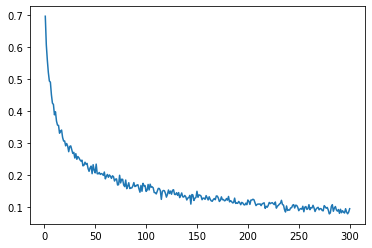

In [ ]:
plt.plot(
    np.arange(1, 301), 
    training.history['loss'], label='Value of loss function'
)

In [ ]:
model.evaluate(normalize(X_test), Y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1832 - accuracy: 0.9492 - precision: 0.9700 - recall: 0.9327


[0.18323421478271484,
 0.9492385983467102,
 0.9700000286102295,
 0.932692289352417]

In [ ]:
predictions_nn= model.predict(normalize(X_test))
predictions_nn= [1 if i>=0.5 else 0 for i in list(predictions_nn)]

In [ ]:
tf.math.confusion_matrix(Y_test, predictions_nn)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[90,  3],
       [ 7, 97]], dtype=int32)>

Using SVM with linear kernel

In [ ]:

rbf_svc_linear = svm.SVC(kernel='linear')
rbf_svc_linear.fit(X, Y_train)

predictions_svm_linear= rbf_svc.predict(normalize(X_test))

tf.math.confusion_matrix(Y_test, predictions_svm_linear)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[92,  1],
       [11, 93]], dtype=int32)>

Using SVM with RBF kernel

In [ ]:

rbf_svc_rbf = svm.SVC(kernel='rbf')
rbf_svc_rbf.fit(X, Y_train)

predictions_svm_rbf= rbf_svc.predict(normalize(X_test))

tf.math.confusion_matrix(Y_test, predictions_svm_rbf)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[92,  1],
       [11, 93]], dtype=int32)>